In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(223549, 10)


,comment_text,identity_hate,insult,obscene,severe_toxic,threat,toxic,positive,len,clean_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,43,explanation edits username hardcore metallica ...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,17,aww matches background colour seemingly stuck ...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,42,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,113,make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,13,sir hero chance remember page


In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(223162, 10)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

In [5]:
labels= ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)
vects = vectorizer.fit_transform(data['clean_text'])

target = data[labels].values

In [7]:
print('X shape', vects.shape)
print('Y shape', target.shape)

X shape (223162, 3582235)
Y shape (223162, 6)


In [8]:
from utils.ml import train_model_one_vs_rest

Mean Score 0.5009 +- 0.0012
Mean accuracy 0.7166 +- 0.0035


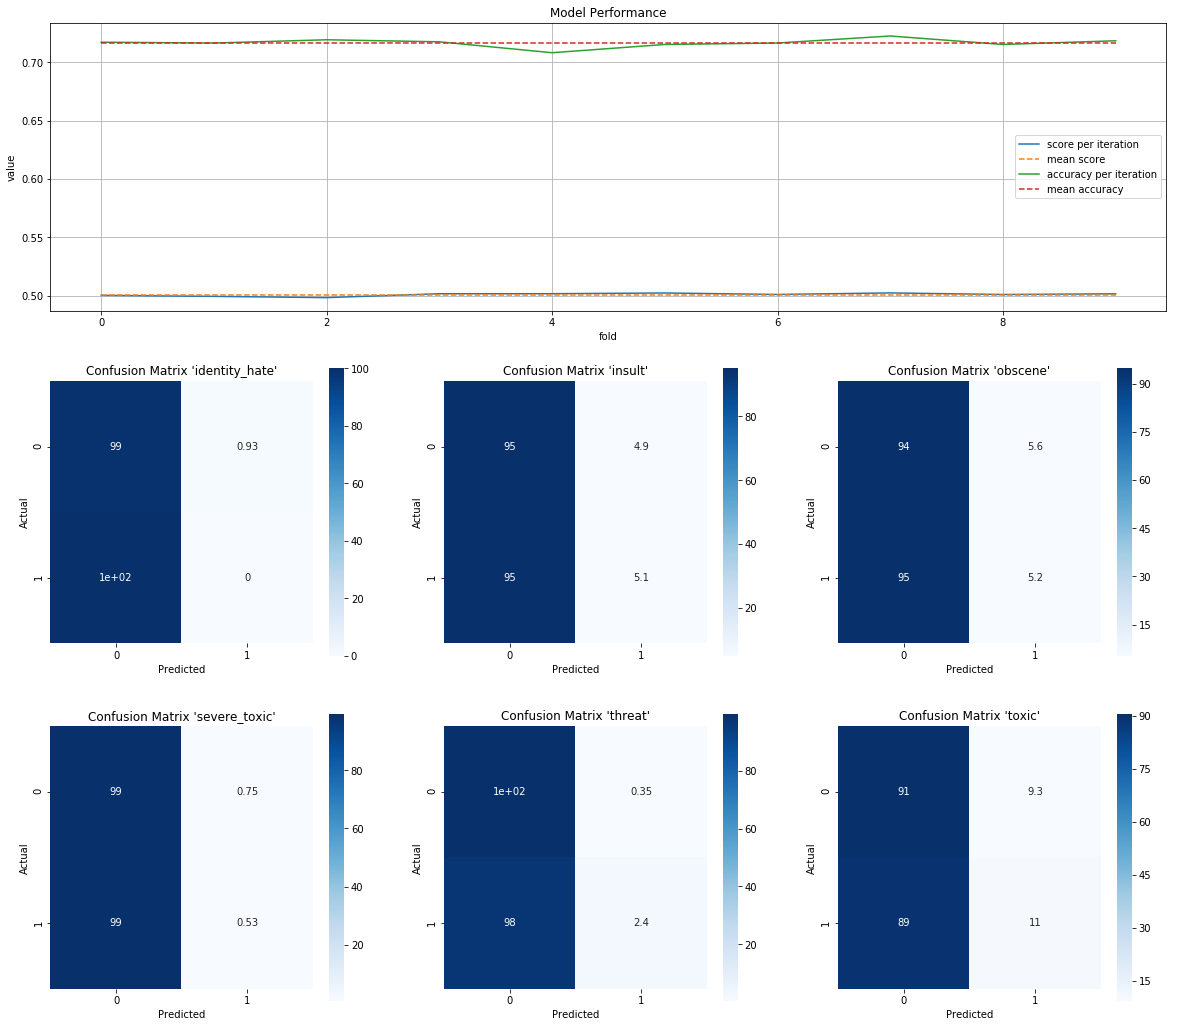

In [9]:
model = DummyClassifier(strategy='stratified', random_state=101)
performance, cm, model = train_model_one_vs_rest(model, vects, target, labels)
print('Mean Score', round(np.mean(performance['score']), 4), '+-', round(np.std(performance['score']), 4))
print('Mean accuracy', round(np.mean(performance['accuracy']), 4), '+-', round(np.std(performance['accuracy']), 4))